# **Binary Classification on ‘Customer_Churn’ using Keras**

**Problem Statement:**

You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.

**Domain :** Telecom

**Domain Context**

Customer churn, in simple terms means that the customer has stopped doing business with the company
and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive
analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.

**Data Information**

In [1]:
import pandas as pd
data_info = pd.read_excel("customer-churn-data dictionary.xlsx")

In [2]:
data_info

,Column Name,Description of Column,Column Type
0,customerID,Tells the customer ID,object
1,gender,Whether the customer is a male or a female,object
2,SeniorCitizen,Whether the customer is a senior citizen or no...,int64
3,Partner,Whether the customer has a partner or not (Yes...,Object
4,Dependents,Whether the customer has dependents or not (Ye...,object
5,tenure,Number of months the customer has stayed with ...,int64
6,PhoneService,Whether the customer has a phone service or no...,object
7,MultipleLines,Whether the customer has multiple lines or not...,object
8,InternetService,"Customer’s internet service provider (DSL, Fib...",object
9,OnlineSecurity,Whether the customer has online security or no...,object


**Data Manipulation**

In [3]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
total_male_customers = df[df['gender'] == 'Male'].shape[0] # or sum(customer['gender']=="Male")
print("Total Male Customers:", total_male_customers)

Total Male Customers: 3555


In [5]:
dsl_customers = df[df['InternetService'] == 'DSL'].shape[0] # or sum(customer['InternetService']=="DSL")
print("Total DSL Internet Customers:", dsl_customers)

Total DSL Internet Customers: 2421


In [6]:
# Female senior citizens with Mailed check
new_customer = df[(df['gender'] == 'Female') &
                  (df['SeniorCitizen'] == 1) &
                  (df['PaymentMethod'] == 'Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [7]:
# Tenure < 10 months or TotalCharges < $500
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


**Data Visualization**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

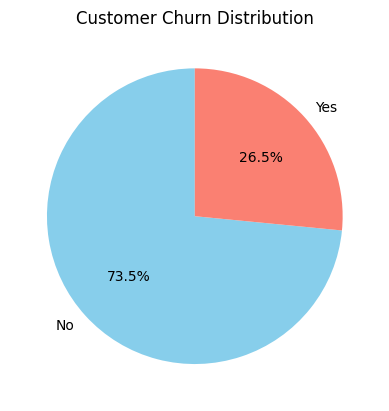

In [9]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()

<ipython-input-10-1499716097>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='InternetService', palette='viridis')


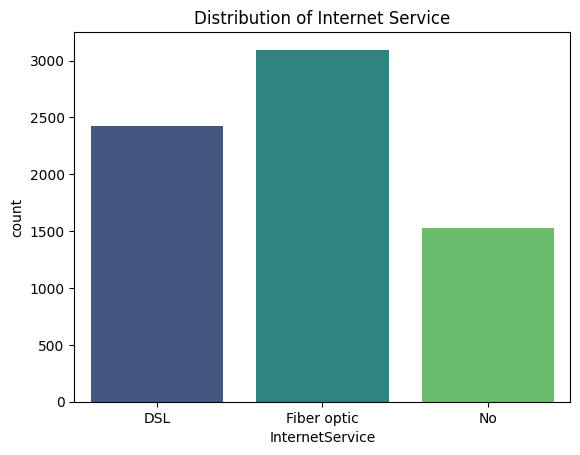

In [10]:
sns.countplot(data=df, x='InternetService', palette='viridis')
plt.title("Distribution of Internet Service")
plt.show()

**Model Building using Keras**

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# drop missing rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop customerID (not useful)
df.drop(['customerID'], axis=1, inplace=True)

# Encode target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode all categorical features
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Normalize numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


**Model 1: Tenure → Churn**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

X = df[['tenure']].values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history1 = model1.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=2)

Epoch 1/150
176/176 - 6s - 35ms/step - accuracy: 0.6862 - loss: 0.6466 - val_accuracy: 0.7342 - val_loss: 0.5593
Epoch 2/150
176/176 - 1s - 8ms/step - accuracy: 0.7342 - loss: 0.5253 - val_accuracy: 0.7342 - val_loss: 0.5116
Epoch 3/150
176/176 - 3s - 20ms/step - accuracy: 0.7342 - loss: 0.5116 - val_accuracy: 0.7342 - val_loss: 0.5096
Epoch 4/150
176/176 - 1s - 4ms/step - accuracy: 0.7429 - loss: 0.5105 - val_accuracy: 0.7569 - val_loss: 0.5088
Epoch 5/150
176/176 - 1s - 7ms/step - accuracy: 0.7518 - loss: 0.5099 - val_accuracy: 0.7342 - val_loss: 0.5087
Epoch 6/150
176/176 - 1s - 7ms/step - accuracy: 0.7520 - loss: 0.5095 - val_accuracy: 0.7342 - val_loss: 0.5088
Epoch 7/150
176/176 - 1s - 3ms/step - accuracy: 0.7477 - loss: 0.5091 - val_accuracy: 0.7569 - val_loss: 0.5079
Epoch 8/150
176/176 - 1s - 3ms/step - accuracy: 0.7461 - loss: 0.5089 - val_accuracy: 0.7548 - val_loss: 0.5080
Epoch 9/150
176/176 - 1s - 4ms/step - accuracy: 0.7504 - loss: 0.5085 - val_accuracy: 0.7569 - val_los

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


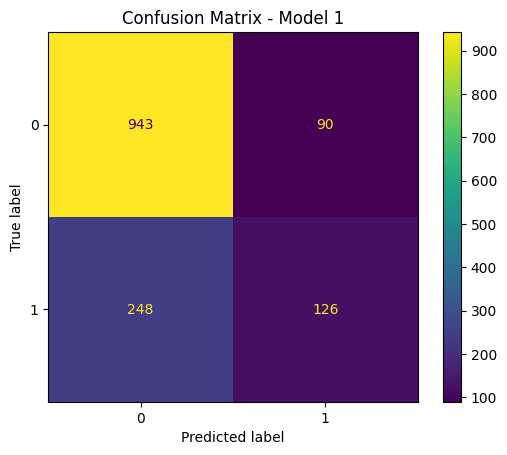

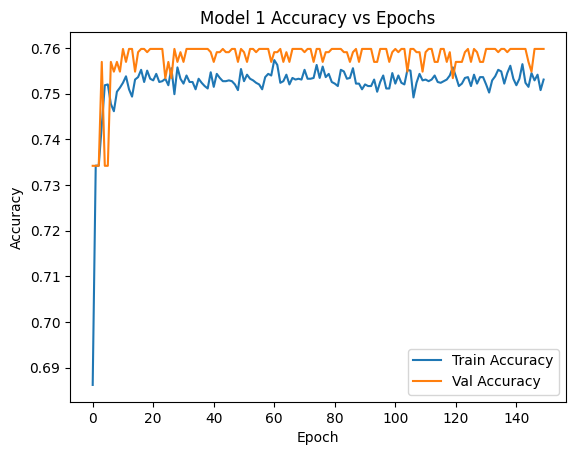

In [15]:
# Confusion Matrix
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
cm1 = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm1).plot()
plt.title("Confusion Matrix - Model 1")
plt.show()

# Accuracy vs Epochs
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.title("Model 1 Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Model 2: Dropout added**

In [16]:
from keras.layers import Dropout

model2 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history2 = model2.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=2)

Epoch 1/150
176/176 - 2s - 14ms/step - accuracy: 0.6740 - loss: 0.6594 - val_accuracy: 0.7342 - val_loss: 0.6047
Epoch 2/150
176/176 - 1s - 4ms/step - accuracy: 0.7344 - loss: 0.5677 - val_accuracy: 0.7342 - val_loss: 0.5242
Epoch 3/150
176/176 - 1s - 7ms/step - accuracy: 0.7365 - loss: 0.5319 - val_accuracy: 0.7342 - val_loss: 0.5118
Epoch 4/150
176/176 - 1s - 3ms/step - accuracy: 0.7447 - loss: 0.5293 - val_accuracy: 0.7342 - val_loss: 0.5115
Epoch 5/150
176/176 - 1s - 4ms/step - accuracy: 0.7426 - loss: 0.5349 - val_accuracy: 0.7342 - val_loss: 0.5114
Epoch 6/150
176/176 - 1s - 3ms/step - accuracy: 0.7394 - loss: 0.5269 - val_accuracy: 0.7342 - val_loss: 0.5101
Epoch 7/150
176/176 - 1s - 3ms/step - accuracy: 0.7431 - loss: 0.5267 - val_accuracy: 0.7342 - val_loss: 0.5109
Epoch 8/150
176/176 - 1s - 4ms/step - accuracy: 0.7433 - loss: 0.5258 - val_accuracy: 0.7342 - val_loss: 0.5103
Epoch 9/150
176/176 - 1s - 7ms/step - accuracy: 0.7433 - loss: 0.5236 - val_accuracy: 0.7342 - val_loss

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


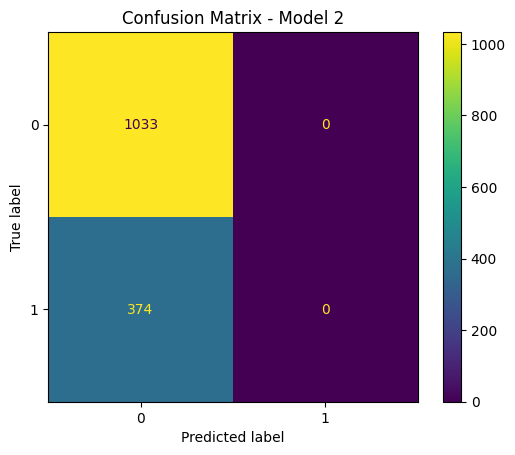

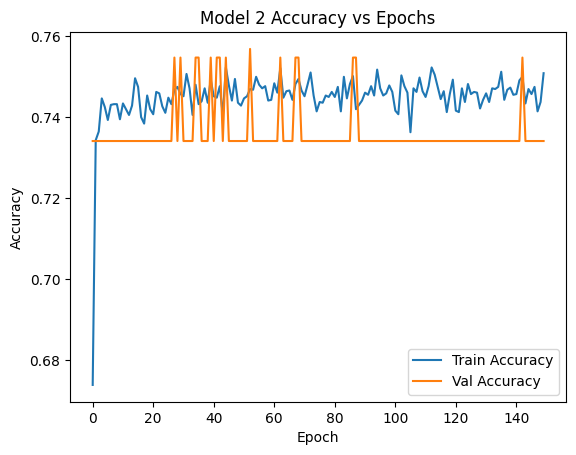

In [18]:
# Confusion Matrix
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm2).plot()
plt.title("Confusion Matrix - Model 2")
plt.show()

# Accuracy vs Epochs
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title("Model 2 Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Model 3: Tenure, MonthlyCharges, TotalCharges → Churn**

In [19]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = Sequential([
    Dense(12, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history3 = model3.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=2)

Epoch 1/150
176/176 - 2s - 14ms/step - accuracy: 0.7342 - loss: 0.5666 - val_accuracy: 0.7342 - val_loss: 0.5180
Epoch 2/150
176/176 - 1s - 5ms/step - accuracy: 0.7632 - loss: 0.4868 - val_accuracy: 0.7747 - val_loss: 0.4746
Epoch 3/150
176/176 - 1s - 4ms/step - accuracy: 0.7780 - loss: 0.4638 - val_accuracy: 0.7719 - val_loss: 0.4682
Epoch 4/150
176/176 - 1s - 3ms/step - accuracy: 0.7792 - loss: 0.4583 - val_accuracy: 0.7726 - val_loss: 0.4645
Epoch 5/150
176/176 - 1s - 4ms/step - accuracy: 0.7820 - loss: 0.4555 - val_accuracy: 0.7768 - val_loss: 0.4632
Epoch 6/150
176/176 - 1s - 4ms/step - accuracy: 0.7838 - loss: 0.4538 - val_accuracy: 0.7726 - val_loss: 0.4624
Epoch 7/150
176/176 - 1s - 4ms/step - accuracy: 0.7847 - loss: 0.4525 - val_accuracy: 0.7775 - val_loss: 0.4621
Epoch 8/150
176/176 - 1s - 4ms/step - accuracy: 0.7861 - loss: 0.4516 - val_accuracy: 0.7719 - val_loss: 0.4617
Epoch 9/150
176/176 - 1s - 4ms/step - accuracy: 0.7847 - loss: 0.4511 - val_accuracy: 0.7839 - val_loss

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


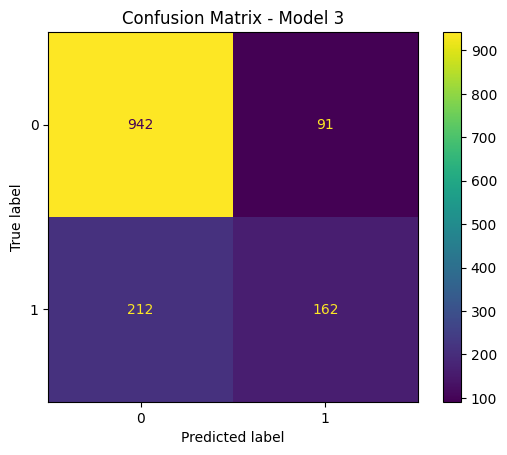

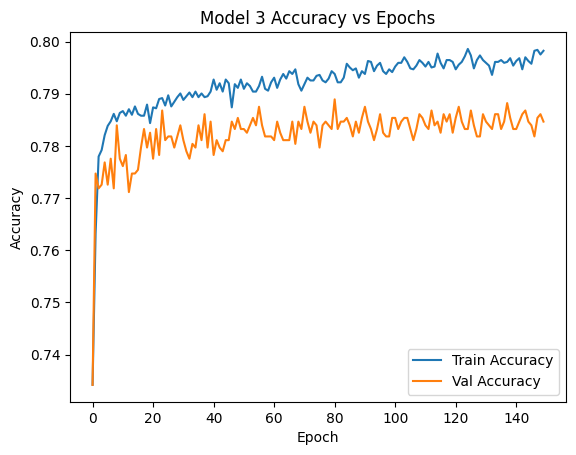

In [21]:
# Confusion Matrix
y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")
cm3 = confusion_matrix(y_test, y_pred3)
ConfusionMatrixDisplay(cm3).plot()
plt.title("Confusion Matrix - Model 3")
plt.show()

# Accuracy vs Epochs
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy')
plt.title("Model 3 Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()